C:\Users\marco\AppData\Local\Temp\ipykernel_21108\2896391989.py:9: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../metabolites/dataset/gcms/0.1_bin_gcms.csv')


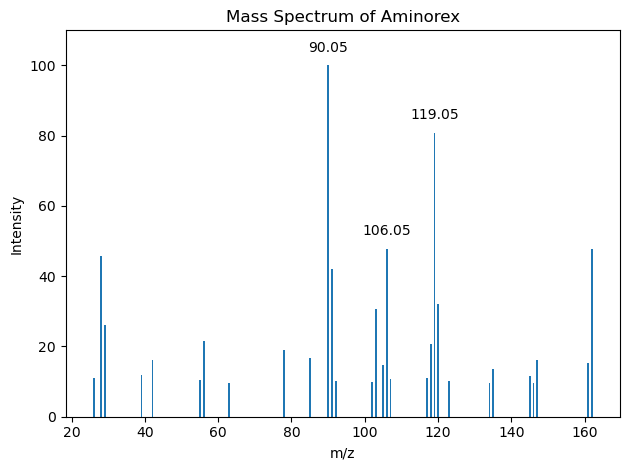

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

BIN_WIDTH = 0.05  # Larghezza del bin
MZ_MIN = 10  # Valore minimo di m/z
MZ_MAX = 700  # Valore massimo di m/z
NUM_BINS = int((MZ_MAX - MZ_MIN) / BIN_WIDTH) + 1

df = pd.read_csv('../metabolites/dataset/gcms/0.1_bin_gcms.csv')

# Estrai la riga dello spettro (ad esempio la riga 10)
spectrum_row = df.iloc[400]
# Estrai il nome della molecola
molecule_name = spectrum_row['name']

# Estrai i valori dello spettro (le colonne "spectrum_bin_...")
spectrum_values = spectrum_row.filter(like='spectrum_bin_').values

max_intensity = spectrum_values.max()
normalized_spectrum = (spectrum_values / max_intensity) * 100

# Estrai i range m/z per l'asse x
mz_ranges = spectrum_row.filter(like='spectrum_bin_').index
mz_midpoints = [(float(r.split('-')[0].split('_')[-1]) + float(r.split('-')[1])) / 2 for r in mz_ranges]

# Trova il primo e l'ultimo bin non nullo
non_zero_indices = [i for i, intensity in enumerate(normalized_spectrum) if intensity != 0]
first_non_zero_index = non_zero_indices[0]
last_non_zero_index = non_zero_indices[-1]

# Considera una piccola regione prima del primo bin non nullo e dopo l'ultimo non nullo
buffer = 5  # ad esempio 5 bin
start_index = max(0, first_non_zero_index - buffer)
end_index = min(NUM_BINS, last_non_zero_index + buffer)

# Visualizza lo spettro
plt.bar(mz_midpoints[start_index:end_index+1], normalized_spectrum[start_index:end_index+1], width=0.5)
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.ylim(0, 110)  # Fissa l'asse y tra 0 e 110
plt.title(f'Mass Spectrum of {molecule_name}')
# Aggiungi annotazioni per i picchi principali (ad esempio i 3 picchi più alti)
top_peaks = sorted(list(enumerate(normalized_spectrum)), key=lambda x: -x[1])[:3]
for i, intensity in top_peaks:
    plt.annotate(f"{mz_midpoints[i]:.2f}", (mz_midpoints[i], intensity), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # per un migliore layout
plt.show()

